https://stackoverflow.com/questions/38218975/how-to-solve-risk-parity-allocation-using-python

In [1]:
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
from numpy.linalg import inv,pinv
from scipy.optimize import minimize

In [2]:
# risk budgeting optimization
def calculate_portfolio_var(w,V):
    # function that calculates portfolio risk
    w = np.matrix(w)
    return (w*V*w.T)[0,0]

In [3]:
def calculate_risk_contribution(w,V):
    # function that calculates asset contribution to total risk
    w = np.matrix(w)
    sigma = np.sqrt(calculate_portfolio_var(w,V))
    # Marginal Risk Contribution
    MRC = V*w.T
    # Risk Contribution
    RC = np.multiply(MRC,w.T)/sigma
    return RC

In [4]:
def risk_budget_objective(x,pars):
    # calculate portfolio risk
    V = pars[0]# covariance table
    x_t = pars[1] # risk target in percent of portfolio risk
    sig_p =  np.sqrt(calculate_portfolio_var(x,V)) # portfolio sigma
    risk_target = np.asmatrix(np.multiply(sig_p,x_t))
    asset_RC = calculate_risk_contribution(x,V)
    J = sum(np.square(asset_RC-risk_target.T))[0,0] # sum of squared error
    return J

In [5]:
def total_weight_constraint(x):
    return np.sum(x)-1.0

In [6]:
def long_only_constraint(x):
    return x

In [7]:
w0 = [0.7, 1.09, 1.096]

In [8]:
V = [[0.49, 0.591, 0.687], [0.591, 1.188, 1.087], [0.687, 1.087, 1.201]]

In [34]:
x_t = [0.33, 0.33, 0.33] # your risk budget percent of total portfolio risk (equal risk)

cons = ({'type': 'eq', 'fun': total_weight_constraint}, {'type': 'ineq', 'fun': long_only_constraint})

res= minimize(risk_budget_objective, w0, args=[V,x_t], method='SLSQP',constraints=cons, options={'disp': True})

w_rb = np.asmatrix(res.x)

w_rb

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.54642400972e-05
            Iterations: 7
            Function evaluations: 35
            Gradient evaluations: 7


matrix([[ 0.44479715,  0.28442509,  0.27077776]])

In [35]:
w_rb = w_rb.tolist()[0]

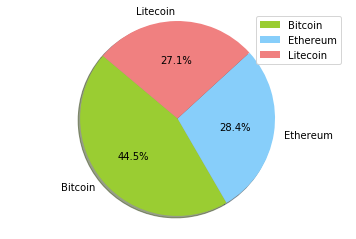

In [42]:
# Data to plot
labels = 'Bitcoin', 'Ethereum', 'Litecoin'
sizes = w_rb
colors = ['yellowgreen', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.legend(labels, loc="best")
plt.show()